Imports

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols

Read Data

In [40]:
advertising = pd.read_csv('data/advertising.csv')

In [41]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Checking for NaN (Not a Number) values for data cleaning

In [42]:
advertising.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Creating a Heat Map to Visualize correlation between different methods of advertisement and sales

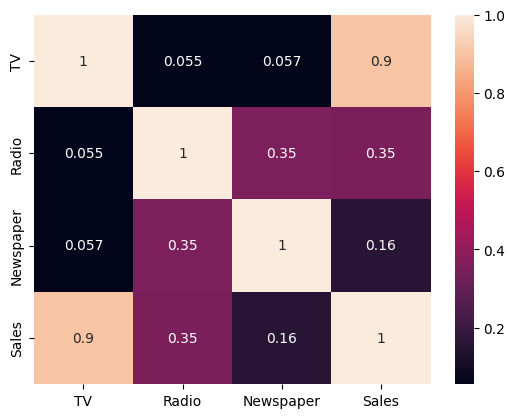

In [48]:
ads_corr = advertising.corr()
sns.heatmap(ads_corr, annot = True)
plt.show()

We observe that TV Sales have the highest positive correlation in comparison to radio ads and newspaper ads

Creating a Plot to visualize the number of TV advertisements VS sales and adding a line of best fit to observe correlation

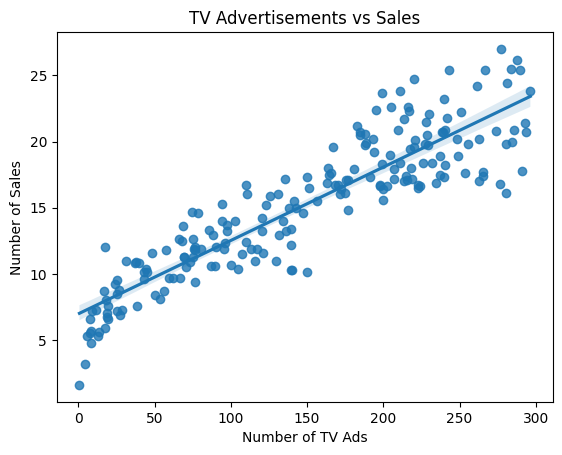

In [43]:
sns.regplot(x = 'TV', y = 'Sales', data = advertising)
plt.title('TV Advertisements vs Sales')
plt.xlabel('Number of TV Ads')
plt.ylabel('Number of Sales')
plt.show()

Correlation between TV Ads and Sales

In [44]:
advertising[['TV', 'Sales']].corr()

,TV,Sales
TV,1.000000,0.901208
Sales,0.901208,1.000000


Observe, there is a very strong positive correlation between the Number of TV advertisements and Sales

Now, predict data for higher numbers of observed TV Ads and the outcome for number of Sales

Model for the TV Ads vs Sales

In [45]:
mdl_tvads_vs_sales = ols('Sales ~ TV', data = advertising).fit()

Creating and printing the prediction data for TV Ads and Sales

In [46]:
explanatory_data = pd.DataFrame({'TV': np.arange(0,501,50)})

sales_pred = mdl_tvads_vs_sales.predict(explanatory_data)

prediction_data = explanatory_data.assign(sales_pred = sales_pred)

print(prediction_data)


     TV  sales_pred
0     0    6.974821
1    50    9.748060
2   100   12.521299
3   150   15.294537
4   200   18.067776
5   250   20.841014
6   300   23.614253
7   350   26.387491
8   400   29.160730
9   450   31.933968
10  500   34.707207


Visualizing the new predicted data with the original data

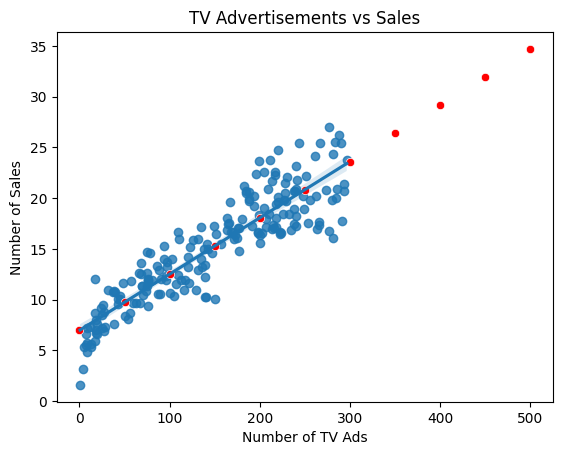

In [47]:
sns.regplot(x = 'TV', y = 'Sales', data = advertising)
sns.scatterplot(x = 'TV', y = 'sales_pred', data = prediction_data, color = 'red', marker = 'o')
plt.title('TV Advertisements vs Sales')
plt.xlabel('Number of TV Ads')
plt.ylabel('Number of Sales')
plt.show()

Observe there are around a predicted 30 and 35 sales for every 400 and 450 TV ads respectively.